# Things to visualize

- Video of car
- Reward and Q functions
- Sets of Experience

# Steps
- Draw road
    - Draw tile
- Draw Car

In [98]:
from driving.roadmap import *
from driving.env import *
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
from matplotlib.transforms import Bbox
import numpy as np
from IPython.display import HTML, clear_output
from celluloid import Camera

(0, 2)

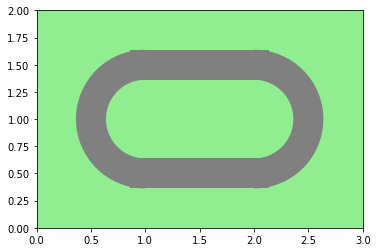

In [17]:
oval = make_oval()
ax = plt.gca()
oval.plot(ax)
ax.set_aspect(1)
ax.set_xlim(0,3)
ax.set_ylim(0,2)

In [99]:
def animate(policy, time=20.0, dt=0.1):
    fig = plt.figure()
    ax = fig.gca()
    ax.set_aspect(1)
    cam = Camera(fig)
    env = DrivingEnv(dt=dt)
    s = env.reset()
    n_steps = round(time/dt)
    for i in range(n_steps):
        # print(f'step {i} of {n_steps}', end='\r')
        env.map.plot(ax)
        car = Rectangle((s[0],s[1]), 0.1, 0.07, s[2], zorder=10, color="orange")
        ax.add_patch(car)
        cam.snap()
        a = policy(s)
        s, r, done, info = env.step(a)
    # return cam.animate()
    anim = cam.animate(interval=dt*1000)
    clear_output()
    return HTML(anim.to_html5_video())

In [85]:
def policy(s):
    d, a = oval.distance_angle_deg(s[0], s[1], s[2])
    return -100*d - 2*a + 0.0*np.random.normal()

In [86]:
def policy(s):
    d, a = oval.distance_angle_deg(s[0], s[1], s[2])
    return -100*d - 2*a

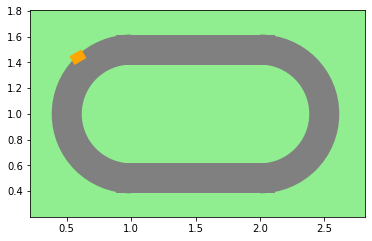

In [100]:
animate(policy, dt=0.2)

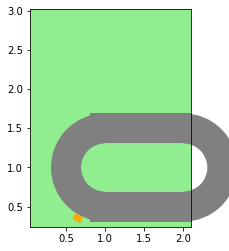

In [90]:
animate(policy, dt=0.5)

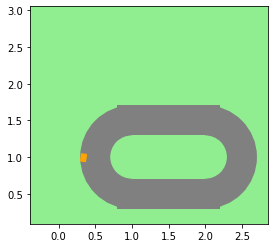

In [77]:
show_sim(policy)